In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
mnist = input_data.read_data_sets('MNIST_data')
training_images, test_images = mnist.train.images, mnist.test.images
images = np.array(list(training_images) + list(test_images))
training_labels, test_labels = mnist.train.labels, mnist.test.labels
session = tf.InteractiveSession()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:

learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10


num_hidden_1 = 256 
num_hidden_2 = 128 
num_input = 784 

X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [4]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [5]:

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

In [6]:
sess = tf.Session()
sess.run(init)

# Training
for i in range(1, num_steps+1):
    batch_x, _ = mnist.train.next_batch(batch_size)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})

    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))


    

Step 1: Minibatch Loss: 0.442824
Step 1000: Minibatch Loss: 0.137237
Step 2000: Minibatch Loss: 0.119690
Step 3000: Minibatch Loss: 0.114696
Step 4000: Minibatch Loss: 0.109714
Step 5000: Minibatch Loss: 0.103794
Step 6000: Minibatch Loss: 0.097387
Step 7000: Minibatch Loss: 0.094786
Step 8000: Minibatch Loss: 0.092745
Step 9000: Minibatch Loss: 0.090429
Step 10000: Minibatch Loss: 0.087958
Step 11000: Minibatch Loss: 0.084323
Step 12000: Minibatch Loss: 0.079972
Step 13000: Minibatch Loss: 0.081850
Step 14000: Minibatch Loss: 0.076700
Step 15000: Minibatch Loss: 0.078381
Step 16000: Minibatch Loss: 0.075119
Step 17000: Minibatch Loss: 0.071966
Step 18000: Minibatch Loss: 0.071262
Step 19000: Minibatch Loss: 0.066837
Step 20000: Minibatch Loss: 0.067479
Step 21000: Minibatch Loss: 0.064310
Step 22000: Minibatch Loss: 0.062229
Step 23000: Minibatch Loss: 0.062007
Step 24000: Minibatch Loss: 0.062114
Step 25000: Minibatch Loss: 0.059215
Step 26000: Minibatch Loss: 0.058938
Step 27000: Mi

In [7]:
reconstructed_images = []
g = sess.run(decoder_op, feed_dict={X:images})
reconstructed_images = list(g)

In [8]:
np.array(reconstructed_images).shape

(65000, 784)

In [110]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(reconstructed_images[:55000], training_labels)
predicted_labels = log_reg.predict(reconstructed_images[55000:])
score = accuracy_score(test_labels,predicted_labels)
print("Accuracy of predictions: " ,score * 100, "%")

Accuracy of predictions:  92.95 %


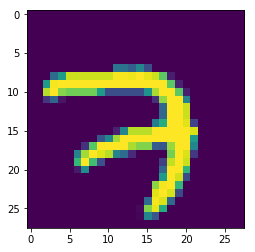

In [9]:
plt.imshow(training_images[0].reshape(28,28))

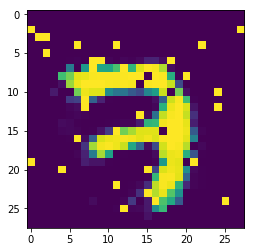

In [10]:
plt.imshow(reconstructed_images[0].reshape(28,28))

In [100]:
training_labels[2]

4

In [10]:
reconstructed_images_reduced_dim = []
g = sess.run(encoder_op, feed_dict={X:images})
reconstructed_images_reduced_dim = list(g)

In [11]:
np.array(reconstructed_images_reduced_dim).shape

(65000, 128)

In [113]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(reconstructed_images_reduced_dim[:55000], training_labels)
predicted_labels = log_reg.predict(reconstructed_images_reduced_dim[55000:])
score = accuracy_score(test_labels,predicted_labels)
print("Accuracy of predictions: " ,score * 100, "%")

Accuracy of predictions:  88.29 %


In [12]:
reduced_dim_distances = euclidean_distances(reconstructed_images_reduced_dim[:10000])

In [17]:
reconstructed_distances = euclidean_distances(reconstructed_images[:10000])

In [18]:
reduced_dim_distances.shape

(10000, 10000)

In [22]:
reconstructed_distances.shape

(10000, 10000)

In [23]:
reconstructed_distances[:10]

array([[ 0.       ,  9.952848 ,  9.361578 , ...,  9.364436 , 10.106868 ,
         9.72345  ],
       [ 9.952848 ,  0.       ,  6.929993 , ...,  8.151341 ,  8.286343 ,
         7.7759852],
       [ 9.361578 ,  6.929993 ,  0.       , ...,  7.4122663,  8.128747 ,
         7.149063 ],
       ...,
       [11.400328 ,  9.985785 , 10.273959 , ..., 10.200666 , 11.005852 ,
         9.733497 ],
       [ 8.252883 ,  7.486067 ,  7.1142397, ...,  7.6140733,  8.6912   ,
         7.404693 ],
       [10.513261 ,  6.4530144,  7.4158125, ...,  8.558944 ,  8.921091 ,
         8.046338 ]], dtype=float32)

In [24]:
actual_distances = euclidean_distances(images[:10000])

In [25]:
actual_distances[:10]

array([[ 0.       , 11.858395 , 10.927333 , ..., 10.725627 , 10.960391 ,
        11.021754 ],
       [11.858395 ,  0.       ,  8.588782 , ...,  9.349463 ,  9.38212  ,
         9.167923 ],
       [10.927333 ,  8.588782 ,  0.       , ...,  7.955282 ,  9.33325  ,
         7.5750613],
       ...,
       [12.557859 , 10.789633 , 11.420871 , ..., 11.234111 , 11.934837 ,
        11.24439  ],
       [ 9.740945 ,  9.381251 ,  7.6300664, ...,  8.364017 ,  9.0807085,
         8.162051 ],
       [12.408794 ,  8.012923 ,  9.242344 , ..., 10.1756735, 10.068241 ,
         9.895334 ]], dtype=float32)

In [26]:
reduced_dim_distances[:10]

array([[0.       , 4.065956 , 3.9075954, ..., 4.5023637, 4.1750402,
        4.733383 ],
       [4.065956 , 0.       , 2.7948856, ..., 4.120319 , 3.7200515,
        4.043821 ],
       [3.9075954, 2.7948856, 0.       , ..., 3.9856663, 3.9819875,
        3.9261768],
       ...,
       [4.1080623, 3.986454 , 3.6648746, ..., 4.379651 , 4.3836217,
        4.1933146],
       [3.6755228, 3.5882707, 3.3971643, ..., 4.051866 , 4.229648 ,
        3.8830817],
       [4.1216455, 2.935905 , 3.0306785, ..., 4.011011 , 3.9164906,
        3.8696458]], dtype=float32)